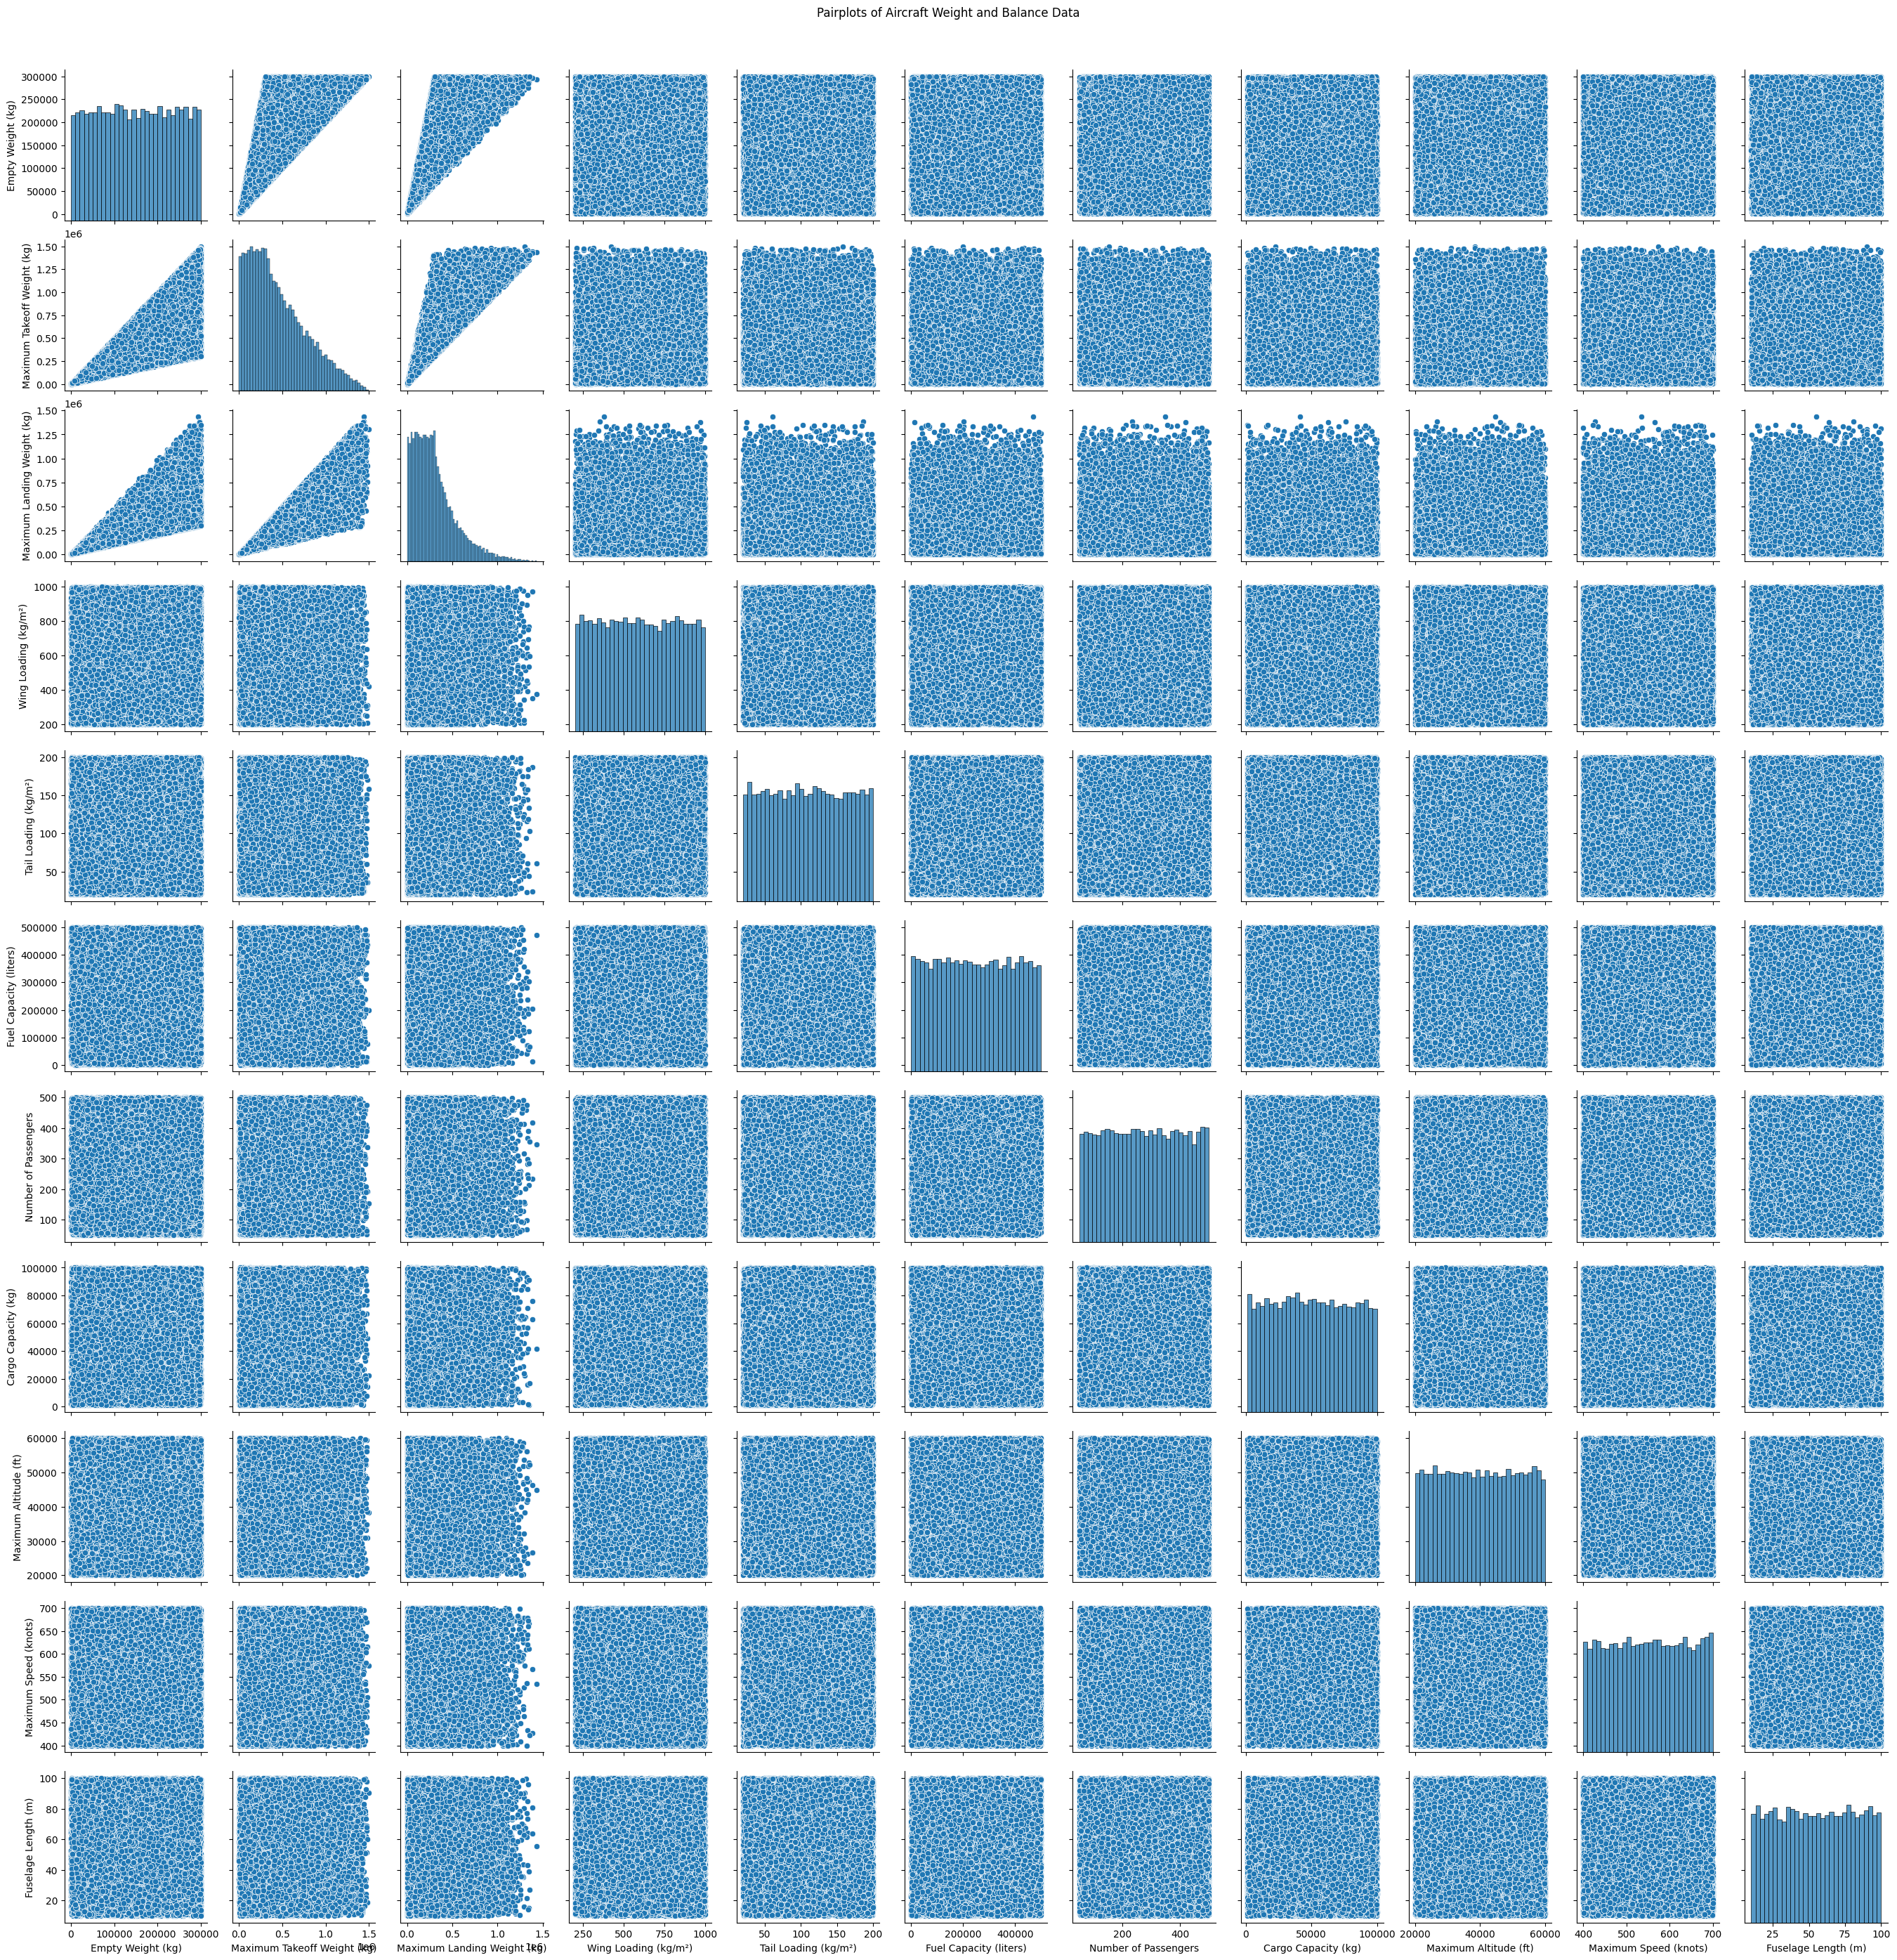

       Empty Weight (kg)  Maximum Takeoff Weight (kg)  \
count       25000.000000                 2.500000e+04   
mean       150550.712410                 4.526516e+05   
std         86463.623898                 3.284551e+05   
min           523.501931                 7.081314e+02   
25%         75478.577895                 1.891280e+05   
50%        150022.889150                 3.806035e+05   
75%        225922.318875                 6.600670e+05   
max        299996.456200                 1.498140e+06   

       Maximum Landing Weight (kg)  Wing Loading (kg/m²)  \
count                 2.500000e+04          25000.000000   
mean                  3.019565e+05            598.404186   
std                   2.323845e+05            231.058661   
min                   6.310162e+02            200.077157   
25%                   1.277688e+05            398.572198   
50%                   2.548705e+05            596.545232   
75%                   4.112665e+05            799.258956   
max   

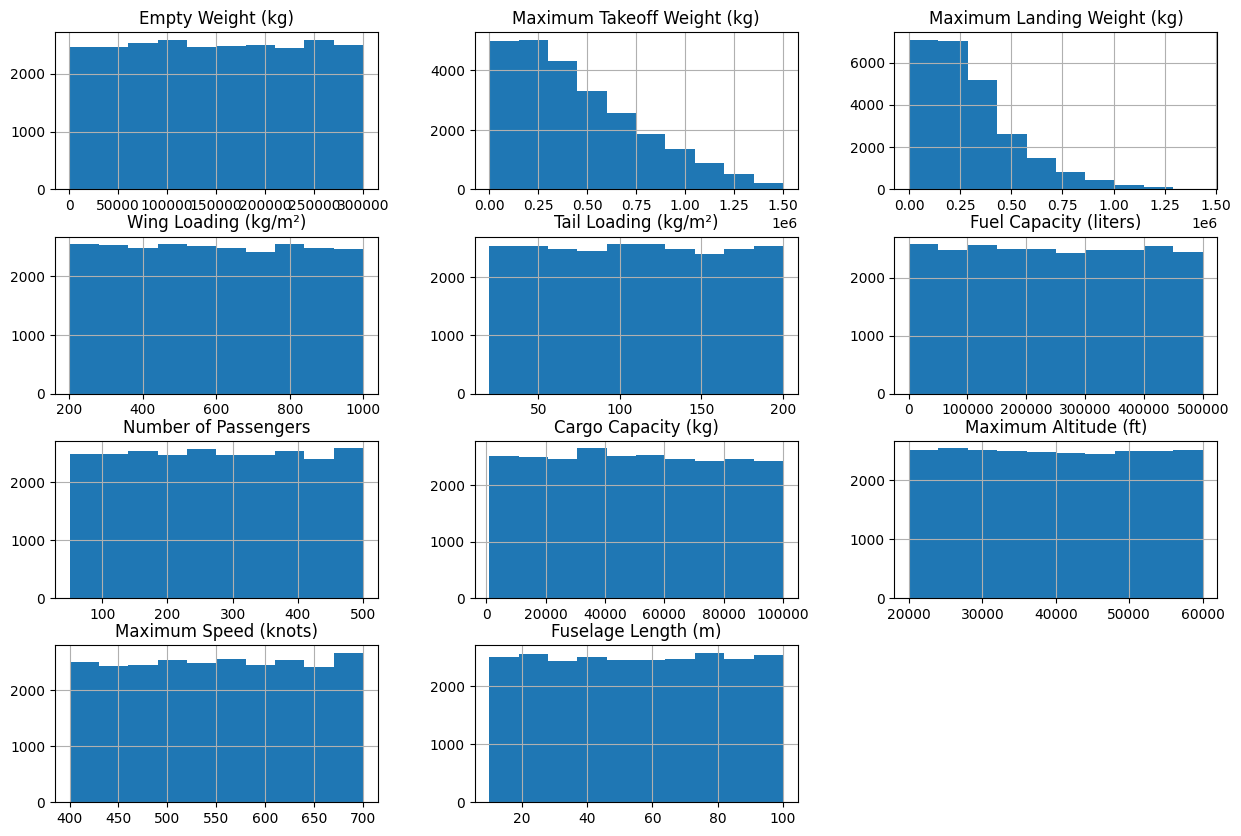

<Figure size 1500x1000 with 0 Axes>

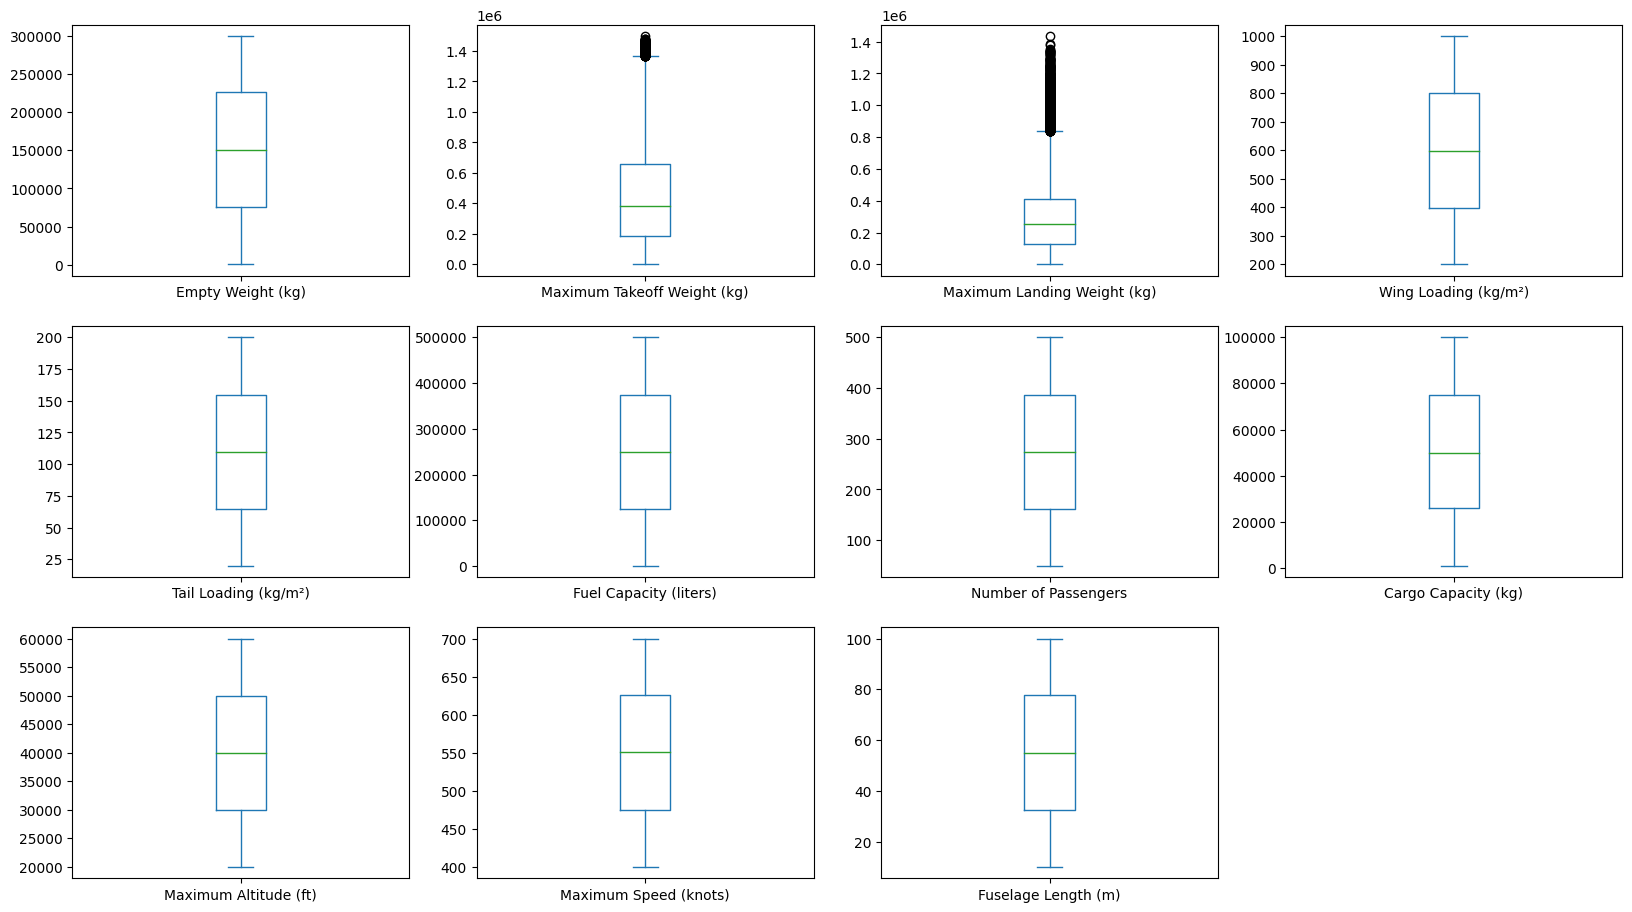

Epoch 1/100
1400/1400 [==============================] - 6s 4ms/step - loss: 0.3403 - mean_squared_error: 0.3403 - mean_absolute_error: 0.4680 - val_loss: 0.2534 - val_mean_squared_error: 0.2534 - val_mean_absolute_error: 0.3984 - lr: 0.0010
Epoch 2/100
1400/1400 [==============================] - 5s 4ms/step - loss: 0.2712 - mean_squared_error: 0.2712 - mean_absolute_error: 0.4194 - val_loss: 0.2402 - val_mean_squared_error: 0.2402 - val_mean_absolute_error: 0.3850 - lr: 0.0010
Epoch 3/100
1400/1400 [==============================] - 5s 4ms/step - loss: 0.2596 - mean_squared_error: 0.2596 - mean_absolute_error: 0.4081 - val_loss: 0.2351 - val_mean_squared_error: 0.2351 - val_mean_absolute_error: 0.3768 - lr: 0.0010
Epoch 4/100
1400/1400 [==============================] - 4s 3ms/step - loss: 0.2563 - mean_squared_error: 0.2563 - mean_absolute_error: 0.4053 - val_loss: 0.2357 - val_mean_squared_error: 0.2357 - val_mean_absolute_error: 0.3796 - lr: 0.0010
Epoch 5/100
1400/1400 [=========

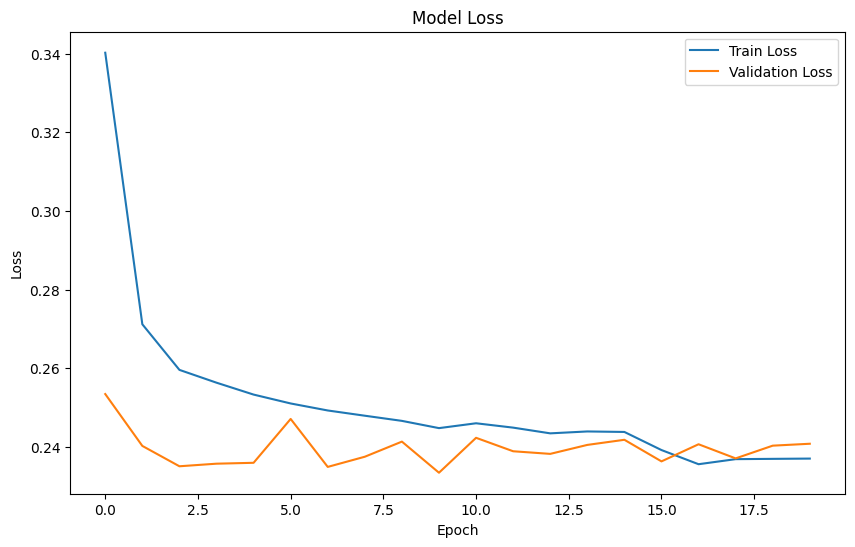

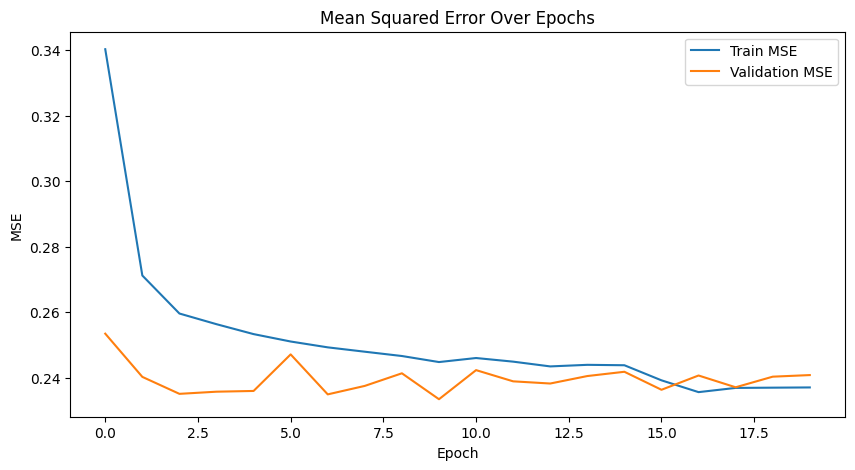

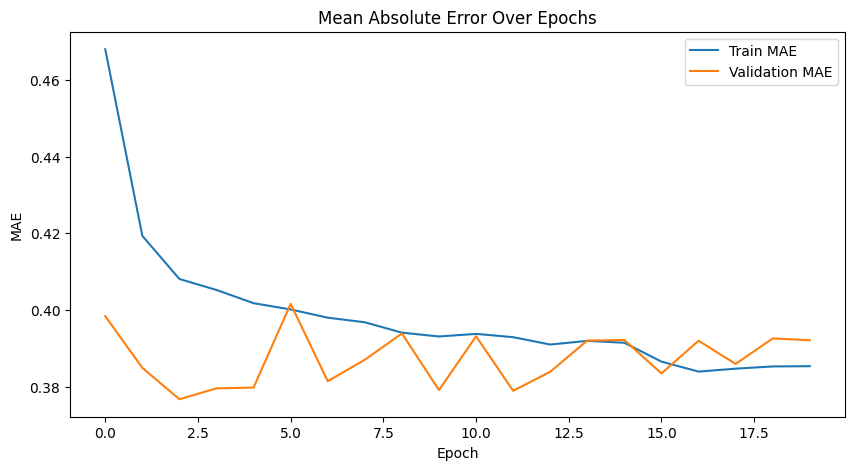

1/1 [==============================] - 0s 34ms/step
gen	nevals	min                  
0  	100   	(4210.0717846521875,)
1/1 [==============================] - 0s 36ms/step
1  	54    	(4210.0717846521875,)
1/1 [==============================] - 0s 28ms/step
2  	59    	(3984.6157153478125,)
1/1 [==============================] - 0s 51ms/step
3  	66    	(2351.1157153478125,)
1/1 [==============================] - 0s 34ms/step
4  	62    	(959.9750903478125,) 
1/1 [==============================] - 0s 65ms/step
5  	68    	(181.1938403478125,) 
1/1 [==============================] - 0s 31ms/step
6  	60    	(181.1938403478125,) 
1/1 [==============================] - 0s 36ms/step
7  	69    	(181.1938403478125,) 
1/1 [==============================] - 0s 33ms/step
8  	63    	(181.1938403478125,) 
1/1 [==============================] - 0s 30ms/step
9  	68    	(77.14990965218749,) 
1/1 [==============================] - 0s 28ms/step
10 	66    	(57.19384034781251,) 
1/1 [===========================

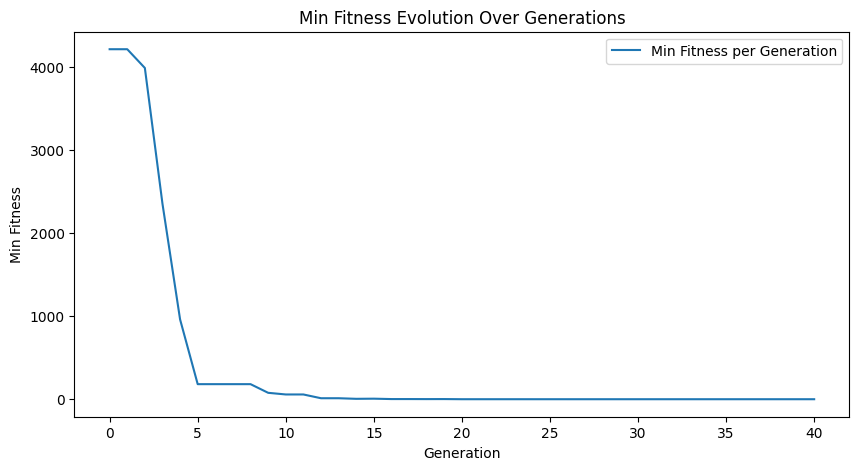

In [1]:
#ML Project
#Julian Pena, 661979108

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import random
from deap import base, creator, tools, algorithms
#from scikeras.wrappers import KerasRegressor

# Load dataset
data = pd.read_csv('aircraft_dataset.csv')

# Removing the first unnamed column index
data.drop(columns=data.columns[0], inplace=True)

sns.pairplot(data)
plt.suptitle("Pairplots of Aircraft Weight and Balance Data",
             y=1.02)
plt.show()

# Drop Aircraft Model and Engine Type from the main dataset, categorical values
data.drop(['Aircraft Model', 'Engine Type', 'Center of Gravity Limits'], axis=1,
          inplace=True)  #COG is insignificant

# Basic Statistical Analysis
print(data.describe())
data.hist(figsize=(15, 10))
plt.show()

# Box plots for each numerical feature
plt.figure(figsize=(15, 10))
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False,
          sharey=False, figsize=(20,15))
plt.show()

# Remove outliers function
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

data = remove_outliers(data, 'Empty Weight (kg)')

# Define features and targets
X = data.drop(['Empty Weight (kg)'], axis=1)
y = data['Empty Weight (kg)'].values.reshape(-1, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            test_size=0.3, random_state=42)

# Feature scaling
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Create Sequential model
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.2), Dense(32, activation='relu'),
    Dropout(0.1), Dense(1, activation='linear')])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error',
              metrics=[MeanSquaredError(), MeanAbsoluteError()])
early_stopping = EarlyStopping(monitor='val_loss', patience=10,
                               restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train model
history = model.fit(X_train_scaled, y_train_scaled, validation_split=0.2,
    epochs=100, batch_size=10, verbose=1,callbacks=[early_stopping, reduce_lr])

# Predict on the test set
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f"Test MAE: {mae}")
print(f"Test RMSE: {rmse}")
print(f"Test R^2: {r2}")

#Plotting training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Mean Squared Error
plt.figure(figsize=(10, 5))
plt.plot(history.history['mean_squared_error'], label='Train MSE')
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
plt.title('Mean Squared Error Over Epochs')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot Mean Absolute Error
plt.figure(figsize=(10, 5))
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error Over Epochs')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

#Genetic Algorithm
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)
X_columns = data.drop(['Empty Weight (kg)'], axis=1).columns

def create_individual():
    return [random.uniform(data[col].min(),
                           data[col].max()) for col in X_columns]

def evaluate(individual):
    # Convert individual to DataFrame to use in scaling and model
    df = pd.DataFrame([individual], columns=X.columns)
    scaled = scaler_X.transform(df)
    predicted_scaled = model.predict(scaled)
    predicted = scaler_y.inverse_transform(predicted_scaled)[0][0]

    target_weight = data['Empty Weight (kg)'].mean()
    return abs(predicted - target_weight),

toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual,
                 create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.2, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Create the population
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", min)
population = toolbox.population(n=100)
ngen = 40
cxpb = 0.5
mutpb = 0.2
logbook = tools.Logbook()
result, logbook = algorithms.eaSimple(population,
                        toolbox, cxpb, mutpb, ngen, stats=stats, verbose=True)

# Extracting fitness data from logbook
gen = logbook.select("gen")
min_fitness = logbook.select("min")

# Plot the evolution of fitness
plt.figure(figsize=(10, 5))
plt.plot(gen, min_fitness, label='Min Fitness per Generation')
plt.xlabel('Generation')
plt.ylabel('Min Fitness')
plt.title('Min Fitness Evolution Over Generations')
plt.legend()
plt.show()